In [1]:
%run "C:/Users/ssiva/OneDrive/Documents/Machine_Learning/Machine_Learning/Machine_Learning_Algorithms/Machine_Learning_Algorithms.ipynb"

Available functions:


create_random_df(model,nrows,ncols,nclasses,target_multiplier = 1),

find_cols_to_ignore(df,thresh_cat = 0.02,cols_to_ignore = None),

impute_cols(df,k=None,thresh_null_cat = 0.02,cols_to_ignore = None),

num_unique_values_in_cols(df,cols = None),

remove_outliers(df_in,outlier_cols,thresh_cat = 0.02,remove = True),

convert_cat(df, cat_cols,output_col=None,reset_index = False),

normalize(df,cols_to_ignore = None,target_col = None),

split_df(df,test_size = 0.3,df_to_return = 'df_train'),

shuffled_split_dfs(df,test_size = 0.3),

check_accuracy(df = None,pred_df = None, test_df = None, algo = 'lin',target_class = None),

stoch_grad_desc(dataset,output_col,cols_to_ignore = None,alpha = 0.1,epoch = 10,algo = 'lin',initial_coeffs = 1),

make_predictions(dataset, coeff_list, output_col,cols_to_ignore = None,algo = 'lin'),

knn(df_train,new_pts_list,dep_col,k = 7,only_pred_df = True),

kmeans(df,k=3,epoch = 1),

cart(df)


Additional Info:

seaborn_palettes is a list

In [2]:
pd.set_option('display.max_columns', 40)

# Loading Data Frame and doing preliminary EDA

In [3]:
cervical = pd.read_csv(r'kag_risk_factors_cervical_cancer.csv')

In [4]:
cervical.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [6]:
cervical.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [8]:
# Checking for null values: there aren't any, but later on, I found null values had a '?' instead
cervical.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


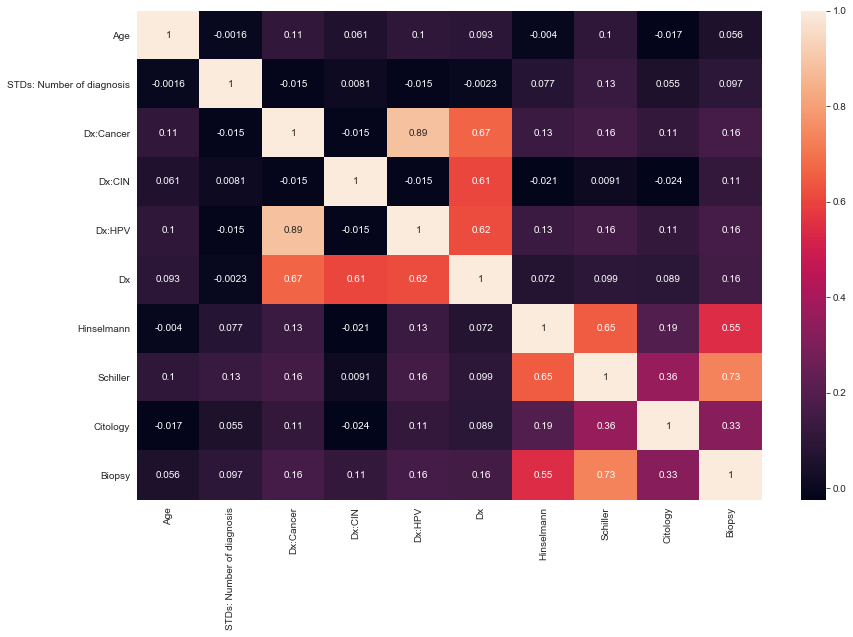

In [5]:
# Looking for multicolinearity and seeing what input variables have most correlation with output variable 'Biopsy'
sns.heatmap(cervical.corr(),annot=True)

In [10]:
#Checking why 'STDs' is not showing up in heat map
cervical['STDs'].value_counts()

0.0    674
?      105
1.0     79
Name: STDs, dtype: int64

In [11]:
cervical.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [6]:
# creating a dictionary where all the keys are the columns and the values are lists containing tuple pairs 
# where 1st value is the value and 2nd value is the number of occurences of that value

d_col_value_counts = {}
for col in cervical.columns:
    d_col_value_counts[col] = list(cervical[col].value_counts().items())

In [7]:
d_col_value_counts

{'Age': [(23, 54),
  (18, 50),
  (21, 46),
  (20, 45),
  (19, 44),
  (24, 39),
  (25, 39),
  (26, 38),
  (28, 37),
  (30, 35),
  (17, 35),
  (29, 33),
  (27, 33),
  (22, 30),
  (35, 29),
  (33, 28),
  (31, 27),
  (36, 24),
  (34, 24),
  (16, 23),
  (15, 21),
  (32, 18),
  (37, 17),
  (41, 13),
  (40, 12),
  (39, 9),
  (38, 9),
  (45, 6),
  (44, 6),
  (42, 6),
  (43, 5),
  (14, 5),
  (46, 3),
  (48, 2),
  (49, 2),
  (52, 2),
  (70, 2),
  (84, 1),
  (79, 1),
  (47, 1),
  (50, 1),
  (51, 1),
  (59, 1),
  (13, 1)],
 'Biopsy': [(0, 803), (1, 55)],
 'Citology': [(0, 814), (1, 44)],
 'Dx': [(0, 834), (1, 24)],
 'Dx:CIN': [(0, 849), (1, 9)],
 'Dx:Cancer': [(0, 840), (1, 18)],
 'Dx:HPV': [(0, 840), (1, 18)],
 'First sexual intercourse': [('15.0', 163),
  ('17.0', 151),
  ('18.0', 137),
  ('16.0', 121),
  ('14.0', 79),
  ('19.0', 60),
  ('20.0', 37),
  ('13.0', 25),
  ('21.0', 20),
  ('22.0', 9),
  ('23.0', 9),
  ('26.0', 7),
  ('?', 7),
  ('27.0', 6),
  ('12.0', 6),
  ('24.0', 6),
  ('29.0', 5)

In [8]:
# Creating a list with all columns that have '?' instead of NaN
l_question_mark_cols = []
for col in d_col_value_counts.keys():
    for value in d_col_value_counts[col]:
        if '?' in value:
            l_question_mark_cols.append(col)
            break

In [17]:
l_question_mark_cols

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

In [19]:
# Checking the list previously made
cervical[cervical == '?'].count().sort_values(ascending = False)

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD (years)                           117
IUD                                   117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:molluscum contagiosum            105
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:syphilis                         105
STDs:AIDS                             105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs:HIV                              105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)                    13
Smokes (years)                    

In [9]:
# Replacing all '?' values with NaN
for col in l_question_mark_cols:
    cervical[col] = cervical[col].apply(lambda val: np.nan if val == '?' else val)

In [21]:
cervical['STDs:HIV'].value_counts()

0.0    735
1.0     18
Name: STDs:HIV, dtype: int64

In [23]:
cervical.isna().sum().sort_values(ascending = False)

STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD (years)                           117
IUD                                   117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:molluscum contagiosum            105
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:syphilis                         105
STDs:AIDS                             105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs:HIV                              105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (packs/year)                    13
Smokes (years)                    

In [10]:
# Dropping two columns that have high number of null values
cervical.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis =1,inplace=True)

In [11]:
ind_problem = []
for i in range(cervical.count()[0]):
    if type(cervical.loc[i,'Smokes (packs/year)']) not in [float,int]:
        ind_problem.append((i,cervical.loc[i,'Smokes (packs/year)']))

In [119]:
ind_problem

[(0, '0.0'),
 (1, '0.0'),
 (2, '0.0'),
 (3, '37.0'),
 (4, '0.0'),
 (5, '0.0'),
 (6, '3.4'),
 (7, '0.0'),
 (8, '0.0'),
 (9, '2.8'),
 (10, '0.0'),
 (11, '0.0'),
 (12, '0.0'),
 (13, '0.0'),
 (14, '0.0'),
 (15, '0.0'),
 (16, '0.0'),
 (17, '0.0'),
 (18, '0.0'),
 (19, '0.0'),
 (20, '0.0'),
 (21, '0.0'),
 (22, '0.0'),
 (23, '0.0'),
 (24, '0.0'),
 (25, '0.0'),
 (26, '0.0'),
 (27, '0.0'),
 (28, '0.04'),
 (29, '0.0'),
 (30, '0.0'),
 (31, '0.0'),
 (32, '0.5132021277'),
 (33, '0.0'),
 (34, '0.0'),
 (35, '0.0'),
 (36, '0.0'),
 (37, '0.0'),
 (38, '0.0'),
 (39, '0.0'),
 (40, '0.0'),
 (41, '0.0'),
 (42, '2.4'),
 (43, '0.0'),
 (44, '6.0'),
 (45, '0.0'),
 (47, '0.0'),
 (48, '0.0'),
 (49, '0.0'),
 (50, '0.0'),
 (51, '0.0'),
 (52, '0.0'),
 (53, '9.0'),
 (54, '0.0'),
 (55, '0.0'),
 (56, '0.0'),
 (57, '1.6'),
 (58, '0.0'),
 (59, '0.0'),
 (60, '0.0'),
 (61, '19.0'),
 (62, '0.0'),
 (63, '0.0'),
 (64, '0.0'),
 (65, '0.0'),
 (66, '0.0'),
 (67, '21.0'),
 (68, '0.0'),
 (69, '0.0'),
 (70, '0.0'),
 (71, '0.0'),
 (7

In [120]:
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

### Values in dataframe are strings.  This is also evident because several numerical columns' datatype is object.  This was because the null values were originally '?' strings. I am treating for this now.

In [12]:
def string_to_num(val):
    import math
    try:
        float(val)
    except:
        return(val)
    if not math.isnan(float(val)):
        if type(val) in [float,int]:
            return val
        else:
            try:
                val = float(val)
            except:
                pass
            finally:
                return(val)
    else:
        return(val)


In [13]:
object_cols = []
for col in cervical.columns:
    if cervical[col].dtype.name == 'object':
        object_cols.append(col)

In [127]:
object_cols

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV']

In [14]:
for col in object_cols:
    cervical[col] = cervical[col].apply(string_to_num)

In [159]:
cervical['Smokes (packs/year)'].dtype.name == 'object'

False

In [161]:
cervical['Smokes (packs/year)'].value_counts()

0.000000     722
0.513202      18
1.000000       6
3.000000       5
0.050000       4
2.000000       4
0.750000       4
1.200000       4
0.200000       4
0.100000       3
6.000000       3
12.000000      3
5.000000       3
7.000000       2
0.040000       2
1.350000       2
2.800000       2
1.600000       2
1.400000       2
8.000000       2
2.400000       2
4.500000       2
0.160000       2
3.500000       2
0.800000       2
9.000000       2
1.250000       1
0.500000       1
2.250000       1
7.500000       1
            ... 
21.000000      1
19.000000      1
0.250000       1
37.000000      1
22.000000      1
1.300000       1
2.500000       1
4.000000       1
0.150000       1
5.700000       1
0.320000       1
7.600000       1
0.700000       1
3.300000       1
0.003000       1
0.900000       1
4.800000       1
2.600000       1
3.400000       1
2.700000       1
2.200000       1
0.400000       1
0.450000       1
0.300000       1
0.025000       1
1.650000       1
0.001000       1
0.370000      

In [162]:
cervical['Smokes (packs/year)'].loc[0]

0.0

In [163]:
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

### Now there are no object columns

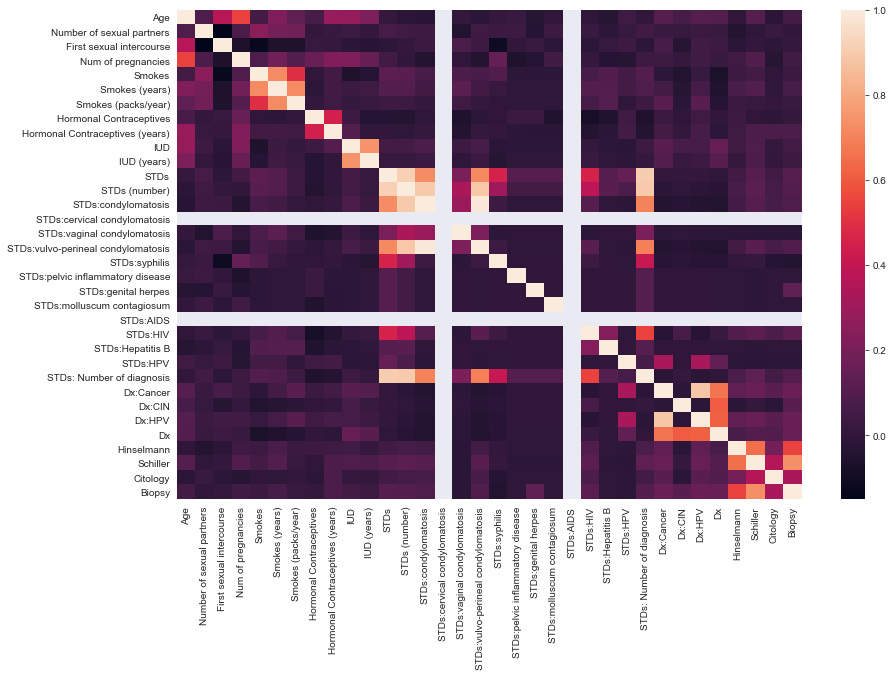

In [179]:
sns.heatmap(cervical.corr())

In [15]:
# Dropping columns 'STDs:cervical condylomatosis' and 'STDs:AIDS' since they only have one category of values
cervical.drop(['STDs:cervical condylomatosis','STDs:AIDS'],axis = 1,inplace = True)

In [44]:
cervical_clean = impute_cols(cervical)

Program took 0.0 hr(s), 0.0 min(s), 0.6233322620391846 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.3669881820678711 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.1466083526611328 sec(s) to run
Program took 0.0 hr(s), 0.0 min(s), 0.08776473999023438 sec(s) to run


In [182]:
cervical_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:vaginal condylomatosis           858 non-null float64
STDs:vulvo-p

### Dataset is completely clean

# Outlier Treatment

In [35]:
cervical_clean.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.530303,16.995338,2.226107,0.143357,1.216392,0.446278,0.686480,2.224143,0.096737,0.580967,0.092075,0.155012,0.051282,0.004662,0.050117,0.020979,0.001166,0.001166,0.001166,0.020979,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.645939,2.791883,1.429043,0.350641,4.057974,2.210351,0.464194,3.520111,0.295771,1.813256,0.289300,0.529617,0.220701,0.068159,0.218313,0.143398,0.034139,0.034139,0.034139,0.143398,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
outlier_cols = ['Age','First sexual intercourse','Num of pregnancies']

In [48]:
cervical_clean = remove_outliers(cervical_clean,outlier_cols=outlier_cols,remove = False)

# Further EDA

In [49]:
cervical_clean.head(2)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [50]:
cervical_clean.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

#### I know that there is some correlation between HPV and cervical cancer so I am exploring that now

In [185]:
cervical_clean['STDs:HPV'].value_counts()

0.0    856
1.0      2
Name: STDs:HPV, dtype: int64

#### Only two patients had HPV so there is very limited analysis possible, but I will still check whether the two patients also had cervical cancer.

In [186]:
cervical_clean[cervical_clean['STDs:HPV'] == 1]['Biopsy']

822    0
849    0
Name: Biopsy, dtype: int64

#### Neither of the patients tested positive for cervical cancer.  With a larger dataset with more positive cases for both diseases, this relationship can be explored further

Text(0.5,1,'Age by Cervical Cancer Results')

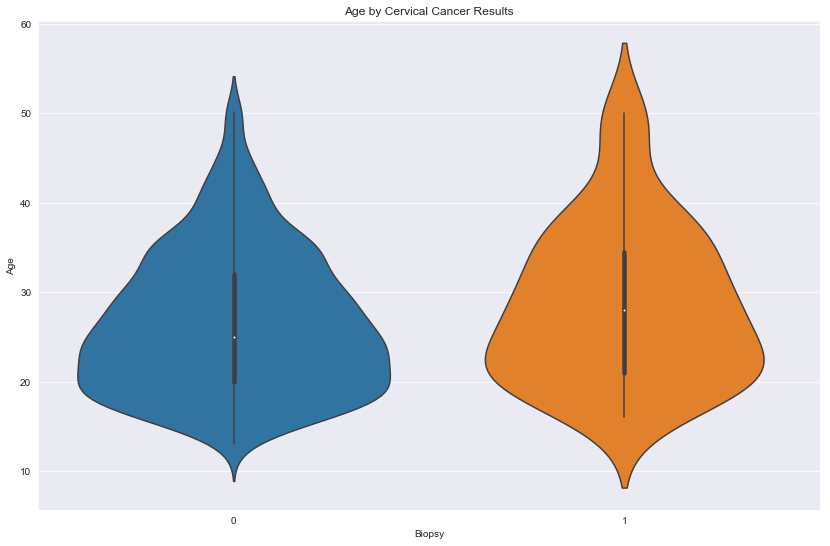

In [187]:
sns.violinplot(data = cervical_clean,x = 'Biopsy',y = 'Age')
plt.title('Age by Cervical Cancer Results')

#### Patients who tested for cervical cancer and had positive results were generally older than patients who received negative test results though only slightly.  Ages of both categories skews positively with respect to age.

Text(0.5,1,'Age Distribution of Patients')

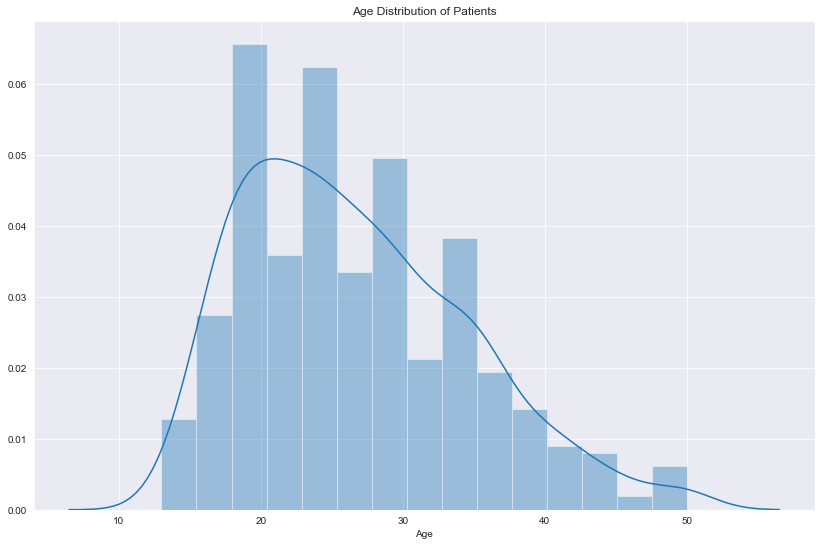

In [188]:
sns.distplot(cervical_clean['Age'])
plt.title('Age Distribution of Patients')

In [112]:
cervical_clean['Age'].mean()

26.684149184149184

#### There is some positive skew in the age of patients with the mean being 26.7 years old.  This is despite treating the 'Age' column for outliers

Text(0.5,1,'Number of STDs Distribution')

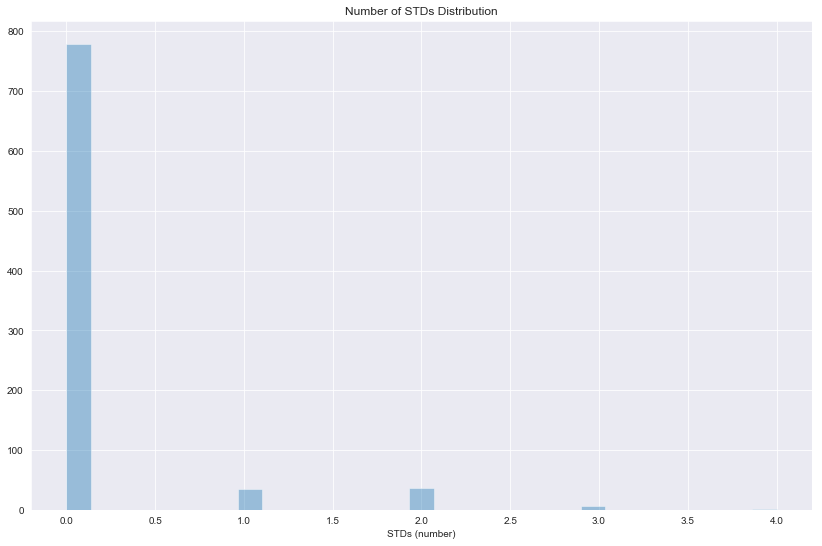

In [189]:
sns.distplot(cervical_clean['STDs (number)'], kde = False)
plt.title('Number of STDs Distribution')

#### Overwhelming number of patients do not have any STDs greatly positively skewing the data.

Text(0.5,1,'Number of Cigarette Packs Smoked Per Year vs. Age')

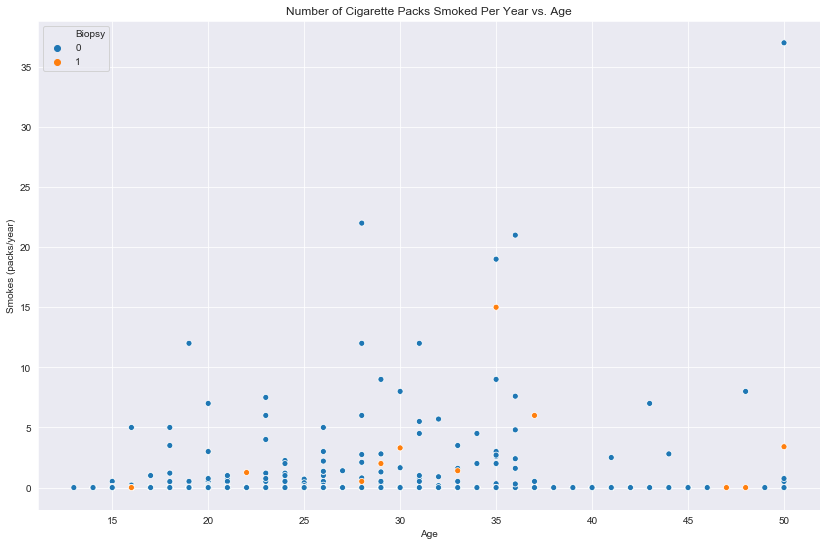

In [190]:
sns.scatterplot(x = 'Age',y = 'Smokes (packs/year)',data = cervical_clean,hue ='Biopsy')
plt.title('Number of Cigarette Packs Smoked Per Year vs. Age')

#### For both groups of patients who have cervical cancer and who do not, there is some positive correlation between age and number of packs of cigarettes smoked a year.  This correlation doesn't not extend beyond age 37 though.

Text(0.5,1,'Distribution of Age of First Sexual Intercourse')

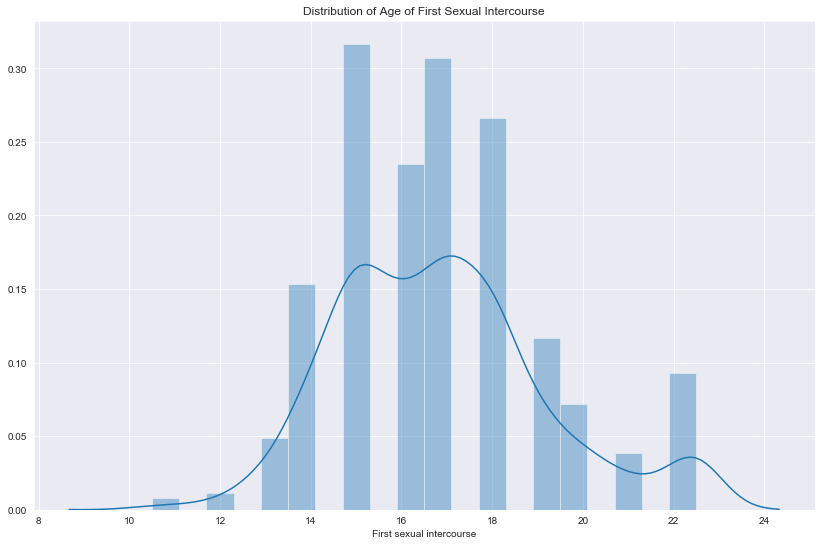

In [191]:
sns.distplot(a = cervical_clean['First sexual intercourse'])
plt.title('Distribution of Age of First Sexual Intercourse')

#### First Sexual Intercourse of patients is normally distributed around 16 years of age.

Text(0.5,1,'Number of Sexual Partners vs. Biopsy')

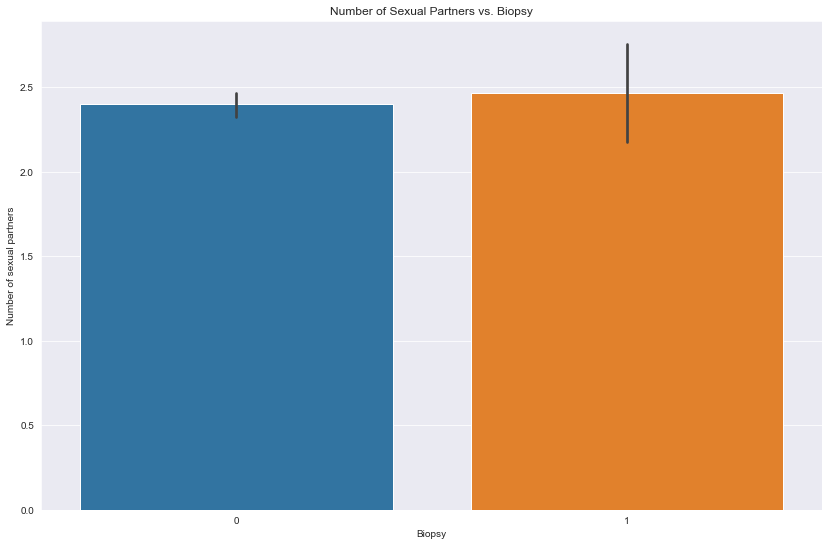

In [193]:
# Creating a barplot showing average number of sexual partners for both groups (patients with and without cervical cancer)
sns.barplot(data = cervical_clean,x = 'Biopsy', y = 'Number of sexual partners')
plt.title('Number of Sexual Partners vs. Biopsy')

#### From above plot, it seems that neither having more or fewer sexual partners is correlated with  a higher chance of having cervical cancer

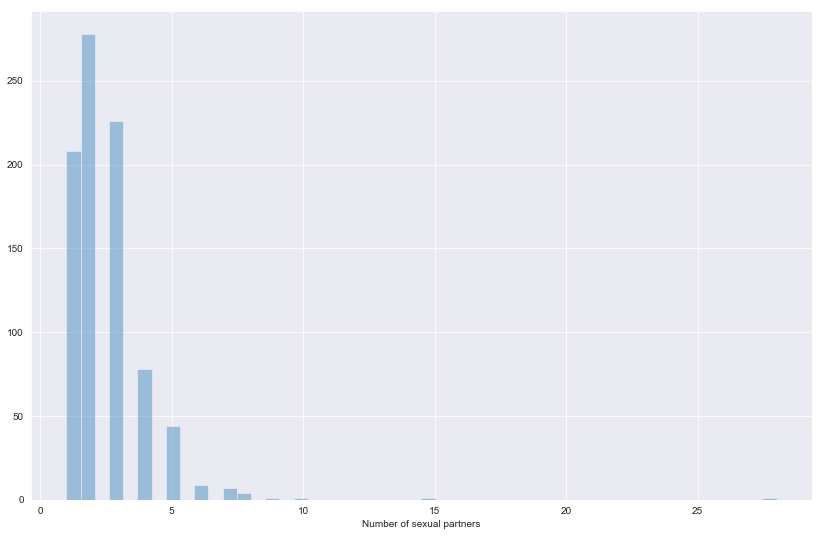

In [117]:
# Creating a distplot of patients based on number of sexual partners they have had
sns.distplot(a = cervical_clean['Number of sexual partners'],kde = False)

#### Most patients have between 1 to 4 sexual partners. I will remove the outliers from this variable as well

In [124]:
cervical_clean = remove_outliers(cervical_clean,outlier_cols = ['Number of sexual partners'],thresh_cat = 0.0001,remove = False)

Text(0.5,1,'Number of STDs vs Number of Sexual Partners')

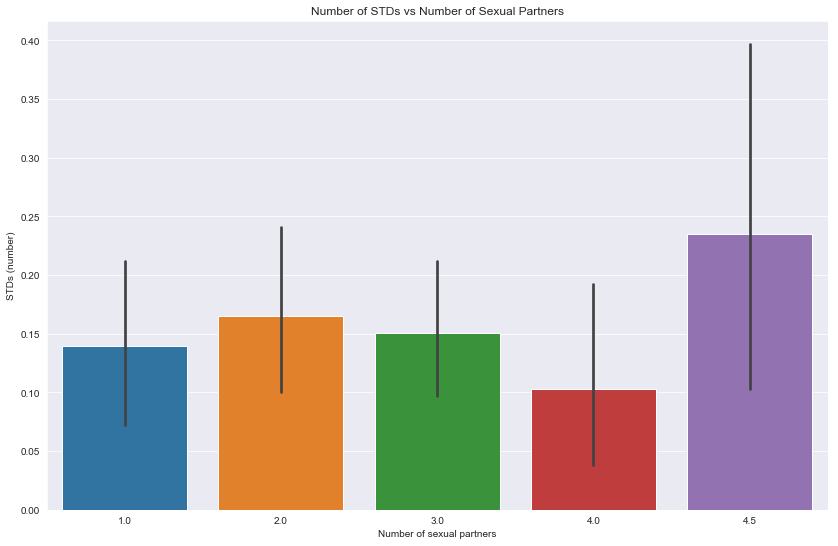

In [192]:
# Creating a barplot showing the average number of STDs for each number of sexual partners
sns.barplot(data = cervical_clean,x = 'Number of sexual partners', y = 'STDs (number)')
plt.title('Number of STDs vs Number of Sexual Partners')

#### From the above plot, there does not seem to be a clear correlation between number of sexual partners and number of STDs.

# Creating DataFrame used to train ML model

In [126]:
cols_to_ignore = find_cols_to_ignore(cervical_clean)

In [127]:
cols_to_ignore

['Dx',
 'STDs:Hepatitis B',
 'Citology',
 'Number of sexual partners',
 'STDs:HPV',
 'Dx:CIN',
 'STDs:syphilis',
 'STDs:HIV',
 'STDs: Number of diagnosis',
 'STDs',
 'STDs:condylomatosis',
 'Smokes',
 'STDs:pelvic inflammatory disease',
 'STDs:vulvo-perineal condylomatosis',
 'Hormonal Contraceptives',
 'Num of pregnancies',
 'Hinselmann',
 'Schiller',
 'Biopsy',
 'STDs:vaginal condylomatosis',
 'IUD',
 'Dx:HPV',
 'First sexual intercourse',
 'STDs:genital herpes',
 'Dx:Cancer',
 'STDs:molluscum contagiosum',
 'STDs (number)']

In [128]:
len(cols_to_ignore)

27

In [129]:
cervical_norm = normalize(cervical_clean,cols_to_ignore=cols_to_ignore,target_col = 'Biopsy')

In [130]:
cervical_converted = convert_cat(cervical_norm,cols_to_ignore,'Biopsy')

In [131]:
cervical_converted.head()

,Age,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Dx__1,STDs:Hepatitis B__1.0,Citology__1,Number of sexual partners__2.0,Number of sexual partners__3.0,Number of sexual partners__4.0,Number of sexual partners__4.5,STDs:HPV__1.0,Dx:CIN__1,STDs:syphilis__1.0,STDs:HIV__1.0,STDs: Number of diagnosis__1,STDs: Number of diagnosis__2,STDs: Number of diagnosis__3,STDs__1.0,...,First sexual intercourse__13.0,First sexual intercourse__14.0,First sexual intercourse__15.0,First sexual intercourse__16.0,First sexual intercourse__17.0,First sexual intercourse__18.0,First sexual intercourse__19.0,First sexual intercourse__20.0,First sexual intercourse__21.0,First sexual intercourse__22.0,First sexual intercourse__22.5,Dx:Cancer__1,STDs:genital herpes__1.0,Hinselmann__1,STDs:molluscum contagiosum__1.0,STDs (number)__1.0,STDs (number)__2.0,STDs (number)__3.0,STDs (number)__4.0,Biopsy
0,0.135135,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.054054,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.567568,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.000000,1.0,1.0,0.1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.891892,0.0,0.0,0.5,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [132]:
cervical_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 61 columns):
Age                                        858 non-null float64
Smokes (years)                             858 non-null float64
Smokes (packs/year)                        858 non-null float64
Hormonal Contraceptives (years)            858 non-null float64
IUD (years)                                858 non-null float64
Dx__1                                      858 non-null uint8
STDs:Hepatitis B__1.0                      858 non-null uint8
Citology__1                                858 non-null uint8
Number of sexual partners__2.0             858 non-null uint8
Number of sexual partners__3.0             858 non-null uint8
Number of sexual partners__4.0             858 non-null uint8
Number of sexual partners__4.5             858 non-null uint8
STDs:HPV__1.0                              858 non-null uint8
Dx:CIN__1                                  858 non-null uint8
STDs:syphilis__1.

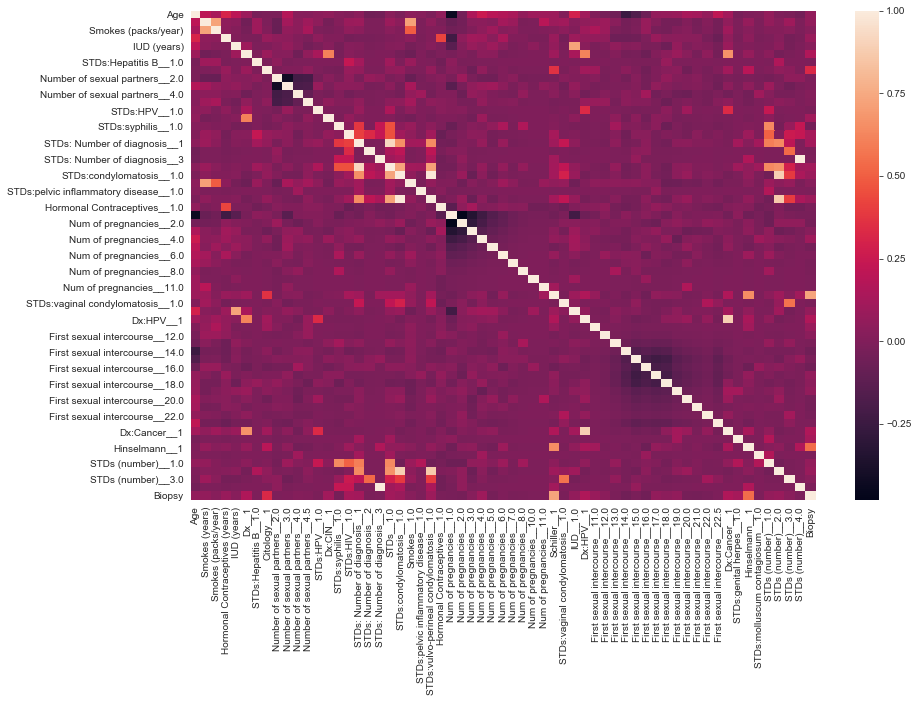

In [133]:
sns.heatmap(cervical_converted.corr())

# Logistic Regression Model

In [134]:
cervical_log = cervical_converted

In [135]:
cervical_log.head()

,Age,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Dx__1,STDs:Hepatitis B__1.0,Citology__1,Number of sexual partners__2.0,Number of sexual partners__3.0,Number of sexual partners__4.0,Number of sexual partners__4.5,STDs:HPV__1.0,Dx:CIN__1,STDs:syphilis__1.0,STDs:HIV__1.0,STDs: Number of diagnosis__1,STDs: Number of diagnosis__2,STDs: Number of diagnosis__3,STDs__1.0,...,First sexual intercourse__13.0,First sexual intercourse__14.0,First sexual intercourse__15.0,First sexual intercourse__16.0,First sexual intercourse__17.0,First sexual intercourse__18.0,First sexual intercourse__19.0,First sexual intercourse__20.0,First sexual intercourse__21.0,First sexual intercourse__22.0,First sexual intercourse__22.5,Dx:Cancer__1,STDs:genital herpes__1.0,Hinselmann__1,STDs:molluscum contagiosum__1.0,STDs (number)__1.0,STDs (number)__2.0,STDs (number)__3.0,STDs (number)__4.0,Biopsy
0,0.135135,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.054054,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.567568,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.000000,1.0,1.0,0.1,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.891892,0.0,0.0,0.5,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [136]:
[cervical_log_train,cervical_log_test] = shuffled_split_dfs(cervical_log)

In [137]:
cervical_log_train.head()

,Age,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Dx__1,STDs:Hepatitis B__1.0,Citology__1,Number of sexual partners__2.0,Number of sexual partners__3.0,Number of sexual partners__4.0,Number of sexual partners__4.5,STDs:HPV__1.0,Dx:CIN__1,STDs:syphilis__1.0,STDs:HIV__1.0,STDs: Number of diagnosis__1,STDs: Number of diagnosis__2,STDs: Number of diagnosis__3,STDs__1.0,...,First sexual intercourse__13.0,First sexual intercourse__14.0,First sexual intercourse__15.0,First sexual intercourse__16.0,First sexual intercourse__17.0,First sexual intercourse__18.0,First sexual intercourse__19.0,First sexual intercourse__20.0,First sexual intercourse__21.0,First sexual intercourse__22.0,First sexual intercourse__22.5,Dx:Cancer__1,STDs:genital herpes__1.0,Hinselmann__1,STDs:molluscum contagiosum__1.0,STDs (number)__1.0,STDs (number)__2.0,STDs (number)__3.0,STDs (number)__4.0,Biopsy
0,0.675676,0.000000,0.00,0.066667,0.052632,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.162162,0.000000,0.00,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.432432,0.351351,0.01,0.008333,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.621622,0.000000,0.00,0.008333,0.263158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.729730,0.000000,0.00,0.666667,0.210526,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
cervical_log_test.head()

,Age,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Dx__1,STDs:Hepatitis B__1.0,Citology__1,Number of sexual partners__2.0,Number of sexual partners__3.0,Number of sexual partners__4.0,Number of sexual partners__4.5,STDs:HPV__1.0,Dx:CIN__1,STDs:syphilis__1.0,STDs:HIV__1.0,STDs: Number of diagnosis__1,STDs: Number of diagnosis__2,STDs: Number of diagnosis__3,STDs__1.0,...,First sexual intercourse__13.0,First sexual intercourse__14.0,First sexual intercourse__15.0,First sexual intercourse__16.0,First sexual intercourse__17.0,First sexual intercourse__18.0,First sexual intercourse__19.0,First sexual intercourse__20.0,First sexual intercourse__21.0,First sexual intercourse__22.0,First sexual intercourse__22.5,Dx:Cancer__1,STDs:genital herpes__1.0,Hinselmann__1,STDs:molluscum contagiosum__1.0,STDs (number)__1.0,STDs (number)__2.0,STDs (number)__3.0,STDs (number)__4.0,Biopsy
600,0.459459,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601,0.297297,0.000000,0.000000,0.033333,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
602,0.270270,0.027027,0.002703,0.233333,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
603,0.135135,0.000000,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
604,0.459459,0.000000,0.000000,0.066667,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
cervical_log_coeffs = stoch_grad_desc(dataset = cervical_log_train,output_col = 'Biopsy',alpha = 0.2,algo = 'log',epoch = 50)

Program took 0.0 hr(s), 0.0 min(s), 31.458773136138916 sec(s) to run


In [140]:
cervical_log_prediction_df = make_predictions(dataset = cervical_log_test,coeff_list=cervical_log_coeffs,output_col= 'Biopsy',algo = 'log')

In [141]:
cervical_log_prediction_df.head(20)

,Age,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Dx__1,STDs:Hepatitis B__1.0,Citology__1,Number of sexual partners__2.0,Number of sexual partners__3.0,Number of sexual partners__4.0,Number of sexual partners__4.5,STDs:HPV__1.0,Dx:CIN__1,STDs:syphilis__1.0,STDs:HIV__1.0,STDs: Number of diagnosis__1,STDs: Number of diagnosis__2,STDs: Number of diagnosis__3,STDs__1.0,...,First sexual intercourse__16.0,First sexual intercourse__17.0,First sexual intercourse__18.0,First sexual intercourse__19.0,First sexual intercourse__20.0,First sexual intercourse__21.0,First sexual intercourse__22.0,First sexual intercourse__22.5,Dx:Cancer__1,STDs:genital herpes__1.0,Hinselmann__1,STDs:molluscum contagiosum__1.0,STDs (number)__1.0,STDs (number)__2.0,STDs (number)__3.0,STDs (number)__4.0,Biopsy,Prediction,Crisp,Correct?
600,0.459459,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.004339,0,True
601,0.297297,0.000000,0.000000,0.033333,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.011683,0,True
602,0.270270,0.027027,0.002703,0.233333,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.024086,0,True
603,0.135135,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.019036,0,True
604,0.459459,0.000000,0.000000,0.066667,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006307,0,True
605,0.864865,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0.059447,0,True
606,0.540541,0.000000,0.000000,0.005333,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.039347,0,True
607,0.162162,0.000000,0.000000,0.066667,0.052632,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005833,0,True
608,0.351351,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.046709,0,True
609,0.756757,0.000000,0.000000,0.666667,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001985,0,True


In [142]:
check_accuracy(df = cervical_log_prediction_df,algo = 'log')

[[237   4]
 [  3  14]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       241
           1       0.78      0.82      0.80        17

    accuracy                           0.97       258
   macro avg       0.88      0.90      0.89       258
weighted avg       0.97      0.97      0.97       258



0.9728682170542652

#### My Logistic Regression Model had a recall of 0.97 and a precision of 0.97 which is very good.  However, when it comes to cancer biopsies, recall of the positive (1) cases is most important.  From the classification report, I had a recall of 0.82 for positive test results.

# Scikit-Learn Logistic Regression Model

In [143]:
X = cervical_clean.drop('Biopsy',axis = 1)
y = cervical_clean['Biopsy']

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
skl_log = LogisticRegression()

In [148]:
skl_log.fit(X_train,y_train)

C:\Users\ssiva\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
skl_log_predictions = skl_log.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix,classification_report

In [152]:
print(confusion_matrix(y_true = y_test,y_pred = skl_log_predictions))

[[233   7]
 [  5  13]]


In [153]:
print(classification_report(y_true = y_test,y_pred = skl_log_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       240
           1       0.65      0.72      0.68        18

    accuracy                           0.95       258
   macro avg       0.81      0.85      0.83       258
weighted avg       0.96      0.95      0.95       258



### Overall, my Logistic Regression had slightly better overall precision and recall.  The most important metric in this case is recall of class 1 (since correct classification of True Positives is most important for cancer classification) which was significantly higher using my model (0.82) vs scikit-learn's model (0.72) 

# KNN Model

In [162]:
cervical_knn = cervical_converted

In [163]:
[cervical_knn_train,cervical_knn_test] = shuffled_split_dfs(cervical_knn)

In [164]:
cervical_knn_predictions_df = knn(df_train = cervical_knn_train,new_pts_list=cervical_knn_test.drop('Biopsy',axis = 1),dep_col = 'Biopsy',k=2)

Program took 0.0 hr(s), 0.0 min(s), 1.816176176071167 sec(s) to run


In [165]:
cervical_knn_predictions_df.head()

,Age,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),Dx__1,STDs:Hepatitis B__1.0,Citology__1,Number of sexual partners__2.0,Number of sexual partners__3.0,Number of sexual partners__4.0,Number of sexual partners__4.5,STDs:HPV__1.0,Dx:CIN__1,STDs:syphilis__1.0,STDs:HIV__1.0,STDs: Number of diagnosis__1,STDs: Number of diagnosis__2,STDs: Number of diagnosis__3,STDs__1.0,...,First sexual intercourse__13.0,First sexual intercourse__14.0,First sexual intercourse__15.0,First sexual intercourse__16.0,First sexual intercourse__17.0,First sexual intercourse__18.0,First sexual intercourse__19.0,First sexual intercourse__20.0,First sexual intercourse__21.0,First sexual intercourse__22.0,First sexual intercourse__22.5,Dx:Cancer__1,STDs:genital herpes__1.0,Hinselmann__1,STDs:molluscum contagiosum__1.0,STDs (number)__1.0,STDs (number)__2.0,STDs (number)__3.0,STDs (number)__4.0,Biopsy
600,0.135135,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
601,0.270270,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
602,0.243243,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
603,0.270270,0.0,0.0,0.019333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
604,0.270270,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [166]:
cervical_knn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 600 to 857
Data columns (total 61 columns):
Age                                        258 non-null float64
Smokes (years)                             258 non-null float64
Smokes (packs/year)                        258 non-null float64
Hormonal Contraceptives (years)            258 non-null float64
IUD (years)                                258 non-null float64
Dx__1                                      258 non-null uint8
STDs:Hepatitis B__1.0                      258 non-null uint8
Citology__1                                258 non-null uint8
Number of sexual partners__2.0             258 non-null uint8
Number of sexual partners__3.0             258 non-null uint8
Number of sexual partners__4.0             258 non-null uint8
Number of sexual partners__4.5             258 non-null uint8
STDs:HPV__1.0                              258 non-null uint8
Dx:CIN__1                                  258 non-null uint8
STDs:syphilis__

In [167]:
sum(cervical_knn_predictions_df['Biopsy'] == cervical_knn_test['Biopsy'])

245

In [168]:
print(confusion_matrix(y_true = cervical_knn_test['Biopsy'],y_pred = cervical_knn_predictions_df['Biopsy']))

[[239   4]
 [  9   6]]


In [169]:
print(classification_report(y_true = cervical_knn_test['Biopsy'],y_pred = cervical_knn_predictions_df['Biopsy']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       243
           1       0.60      0.40      0.48        15

    accuracy                           0.95       258
   macro avg       0.78      0.69      0.73       258
weighted avg       0.94      0.95      0.94       258



#### My KNN model had a recall for class 1 of 0.40. It had a weighted average recall of 0.95 and a weighted average precision of 0.94

# Scikit-Learn KNN Model

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
sklearn_knn = KNeighborsClassifier(n_neighbors = 2)

In [172]:
sklearn_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [173]:
sklearn_knn_predictions = sklearn_knn.predict(X_test)

In [174]:
print(confusion_matrix(y_true = y_test,y_pred=sklearn_knn_predictions))

[[240   0]
 [ 17   1]]


In [175]:
# The Scikit-Learn KNN model 0% of positive biopsycases correctly and was less accurate than my model which
# had a recall for positive cases of 33%
print(classification_report(y_true = y_test, y_pred = sklearn_knn_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       240
           1       1.00      0.06      0.11        18

    accuracy                           0.93       258
   macro avg       0.97      0.53      0.54       258
weighted avg       0.94      0.93      0.91       258



#### scikit-learn's KNN model had a recall for class 1 of only 0.06 compared to my KNN model's recall of 0.40.  It also had a weighted average recall of 0.93 and a weighted average precision of 0.94

### Overall both my KNN model and Logistic Regression model had higher performing metrics than their respective models from scikit-learn.  Logistic Regression was the best at classifying probably due to the very high ratio of patients who did not have cervical cancer vs patients who did.  This will skew the classifications of the KNN model toward 'Biopsy' classification of 0.

In [104]:
cervical_log_test['Biopsy'].value_counts()

0    239
1     19
Name: Biopsy, dtype: int64

In [105]:
239/(239+19)

0.9263565891472868

### If every new Biopsy classification was 0, 92.6 percent of classifications would be correct, but this would ensure a recall for class 0 of 0 which is very dangerous in a real world scenario.  Overall, my Logistic Regression model was the best model to use in this scenario.